In [1]:
# pip install opencv-contrib-python

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# speed-up using multithreads
cv2.setUseOptimized(True);
cv2.setNumThreads(4);

In [5]:
# https://learnopencv.com/selective-search-for-object-detection-cpp-python/

In [6]:
im = cv2.imread('catdog.png')
print(im.shape)

(290, 434, 3)


In [7]:
# create selective search segmentation object
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [8]:
# set input image
ss.setBaseImage(im)

In [9]:
# Choose between fast or accurate selective Search method:
# fast but low recall V.S. high recall but slow 

# ss.switchToSelectiveSearchFast()
ss.switchToSelectiveSearchQuality()

In [10]:
# run selective search
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

Total Number of Region Proposals: 2525


In [11]:
rects

array([[155,   0,  28,  10],
       [  7,   7,  25,  23],
       [384, 137,  26,  21],
       ...,
       [  0,  47, 238, 233],
       [ 46,  41, 205, 229],
       [ 46,  16, 366, 260]])

In [12]:
rects.shape

(2525, 4)

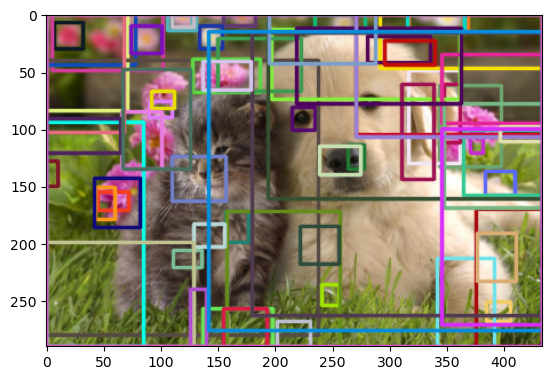

In [13]:
# Show selective search results

# number of region proposals to show
numShowRects = 70

# create a copy of original image
imOut = im.copy()

# itereate over all the region proposals
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < numShowRects):
        x, y, w, h = rect
        color = list(np.random.random(size=3) * 256)
        cv2.rectangle(imOut, (x, y), (x+w, y+h), color, 2, cv2.LINE_AA)
    else:
        break

plt.imshow(imOut[...,::-1])